In [1]:
import rasterio

In [46]:
import topojson as tp
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import pandas as pd

In [3]:
rki = gpd.read_file('RKI_Corona_Landkreise.geojson')

In [4]:
geometry_lk = rki[['county','geometry']]

In [33]:
topo = tp.Topology(geometry_lk, prequantize=False, prevent_oversimplify=True)

In [42]:
gdf_simplified = topo.toposimplify(0.01).to_gdf()

In [58]:
gdf_simplified.set_index('county').to_pickle('geometry_lk_simplified_0_001.gzip')

In [52]:
#geometry_lk_simple = gdf_simplified.set_index('county')

<GeoAxesSubplot:>

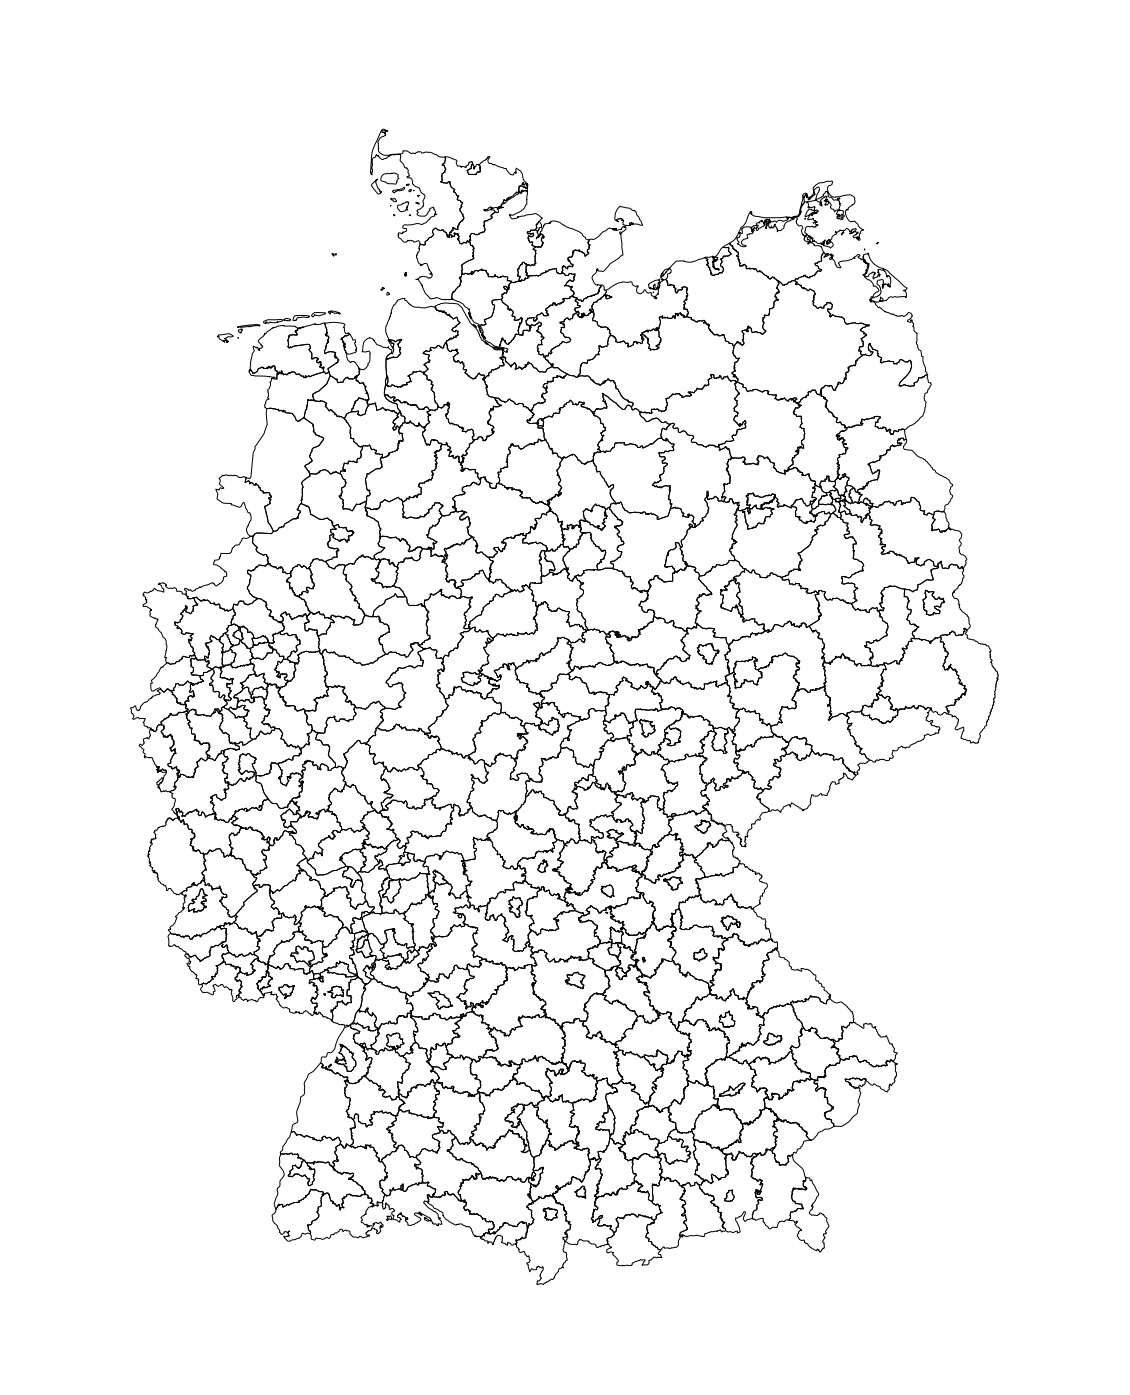

In [40]:
gplt.polyplot(gdf_simplified, figsize=(20, 30), projection=gcrs.AlbersEqualArea())

In [53]:
#geometry_lk_simple = pd.read_pickle("geometry_lk_simplified_0_01.gzip")
geometry_lk_simple

,geometry
county,
SK Flensburg,"MULTIPOLYGON (((9.41266 54.82264, 9.40561 54.7..."
SK Kiel,"MULTIPOLYGON (((10.16916 54.43138, 10.16852 54..."
SK Lübeck,"MULTIPOLYGON (((10.87683 53.98737, 10.84089 53..."
SK Neumünster,"MULTIPOLYGON (((9.99545 54.14972, 9.92878 54.1..."
LK Dithmarschen,"MULTIPOLYGON (((8.69258 54.06045, 8.69844 54.0..."
...,...
SK Berlin Spandau,"MULTIPOLYGON (((13.23119 52.56124, 13.21740 52..."
SK Berlin Steglitz-Zehlendorf,"MULTIPOLYGON (((13.31952 52.46699, 13.18817 52..."
SK Berlin Mitte,"MULTIPOLYGON (((13.37721 52.56091, 13.30153 52..."


In [43]:
rki = gpd.read_file('RKI_Corona_Landkreise.geojson')

In [54]:
pavel = pd.read_csv('Data.csv')
merged = gpd.GeoDataFrame(pavel.join(geometry_lk_simple, on='Landkreis'))

In [55]:
sub = merged[['Landkreis', 'Kontaktrisiko', 'InzidenzFallNeu-7-Tage', 'geometry', 'MeldeDauerFallNeu-Schnitt']]
sub['Kehrwert_risiko'] = 1/sub['Kontaktrisiko']

/Users/bjoern/Working/covid19/Corona/venv/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [57]:
sub[sub.geometry != None].to_file("pavel_simple_0_01.geojson", driver='GeoJSON')

In [59]:
import matplotlib

In [61]:
matplotlib.colors.Colormap("CMRmap").